In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [2]:
can = pd.read_csv('/Users/praveena/Desktop/can.csv')
cmp = pd.read_csv('/Users/praveena/Desktop/cmp.csv')
can_dummies=pd.get_dummies(can)
cmp_dummies=pd.get_dummies(cmp)

In [3]:
row_count = sum(1 for row in can['cid'])
print(row_count)

9


In [4]:
row_count = sum(1 for row in cmp['jid'])
print(row_count)

5


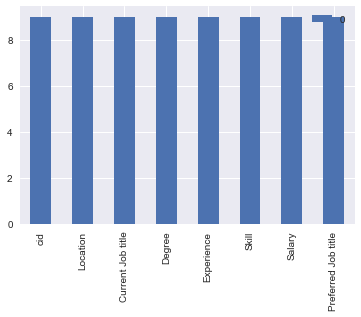

Index(['cid', 'Location', 'Current Job title', 'Degree', 'Experience', 'Skill',
       'Salary', 'Preferred Job title'],
      dtype='object')
Index(['jid', 'Location', 'Job Title', 'Degree', 'Experience', 'Skill',
       'Salary'],
      dtype='object')


In [5]:
Count_vals= can.count()
Count_vals = Count_vals.to_frame()
Count_vals.plot.bar()
plt.show()
print(can.columns)
print(cmp.columns)

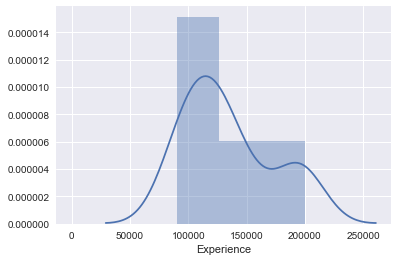

In [6]:
%matplotlib inline
sns.distplot(can['Salary'])
sns.distplot(can['Experience']);
plt.show()

In [7]:
cmp

,jid,Location,Job Title,Degree,Experience,Skill,Salary
0,1,TX,Software Development Engineer,PhD,2,C,270000
1,2,CA,Software Engineer,Bachelors,3,"Java,C",130000
2,3,TX,Front End Engineer,Masters,4,C++,120000
3,4,CA,Back End Enginner,Masters,6,Java,180000
4,5,CA,Data Scientist,PhD,2,"Python,R,Data Analysis,SQL,MS Excel",127000


In [8]:
can

,cid,Location,Current Job title,Degree,Experience,Skill,Salary,Preferred Job title
0,1,TX,Front End Engineer,Masters,6,C++,130000,Software Development Engineer
1,2,CA,Back End Enginner,Masters,4,C,110000,Software Engineer
2,3,CA,Database Analyst,Masters,1,C++,96000,Front End Engineer
3,4,NY,Software Project Manager,Masters,6,HTML/CSS/Javascript,200000,Back End Enginner
4,5,TX,Software Developer,Masters,6,C,190000,Database Analyst
5,6,UT,Software Engineer,Bachelors,2,HTML/CSS/Javascript,90000,Software Project Manager
6,7,CA,Software Development Engineer,Masters,2,HTML/CSS/Javascript,115000,Software Developer
7,8,KY,Software Engineer,PhD,3,Python,150000,Software Engineer
8,9,PDX,Data Scientist,PhD,3,"Python,R,Data Analysis,SQL,MS Excel",125000,Data Scientist


/Users/praveena/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/praveena/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/praveena/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
/Users/praveena/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/praveena/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


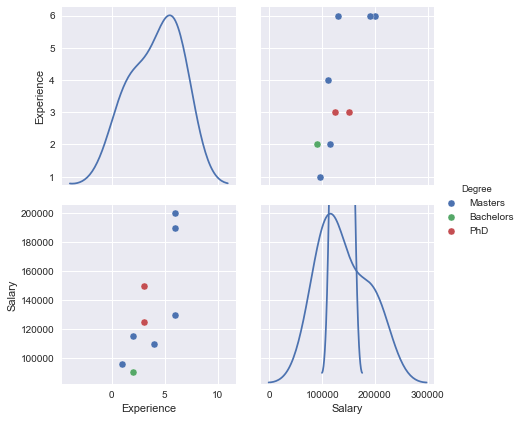

In [9]:
sns.pairplot(can.drop("cid", axis=1), hue="Degree", size=3, diag_kind="kde")


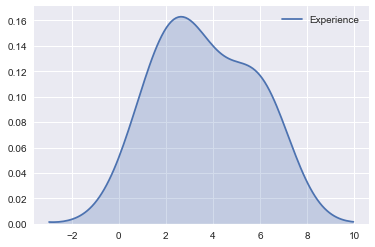

In [10]:
sns.kdeplot(can['Experience'],shade=True)
plt.show()

In [11]:
score_val=[]
row_vals=[]
col_vals=[]
exp=[]
deg=[]
skill=[]
loc=[]
salary=[]

In [12]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')


def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

def title_check(user1,job1):
    for row in range(len(can)):
        for col in range(len(cmp)):
            candidate_current_title=can['Current Job title'].values[row]
            job_title=cmp['Job Title'].values[col]
            candidate_preferred_title=can['Preferred Job title'].values[row]
            vector1 = text_to_vector(candidate_current_title)
            vector2 = text_to_vector(job_title)
            vector3 = text_to_vector(candidate_preferred_title)
            cosine1_current_with_jobtitle = get_cosine(vector1, vector2)
            cosine2_preferred_with_jobtitle = get_cosine(vector2, vector3)
    
   
            if(cosine1_current_with_jobtitle>0.60 or cosine2_preferred_with_jobtitle>0.60):
                                            score=max(cosine1_current_with_jobtitle,cosine2_preferred_with_jobtitle)
                                            #print(can['cid'].values[row],cmp['jid'].values[col],score)
                                            row_vals.append(can['cid'].values[row])
                                            col_vals.append(cmp['jid'].values[col])
                                            score_val.append(score)
                                            exp_check(row,col)
                                            #print(can['cid'].values[row],cmp['jid'].values[col])
                                        
                        
                        
                                            
            else:
                pass

        


        
#            print(can['Location'].values[row],cmp['Location'].values[col],"no",sim)
#            sim=sim+0
    

In [13]:
can['Degree'].replace('PhD',3, inplace=True)
can['Degree'].replace('Masters',2, inplace=True)
can['Degree'].replace('Bachelors',1, inplace=True)
cmp['Degree'].replace('PhD',3, inplace=True)
cmp['Degree'].replace('Masters',2, inplace=True)
cmp['Degree'].replace('Bachelors',1, inplace=True)

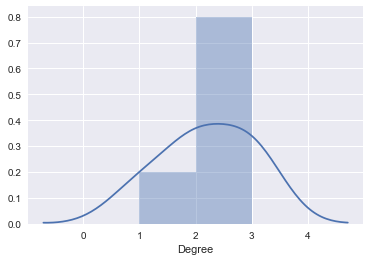

In [14]:
%matplotlib inline
sns.distplot(cmp['Degree']);
plt.show()

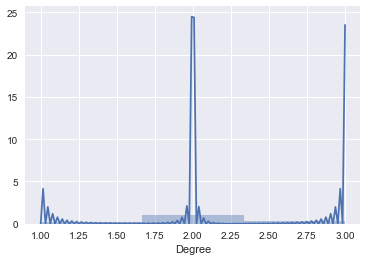

In [15]:
%matplotlib inline
sns.distplot(can['Degree']);
plt.show()

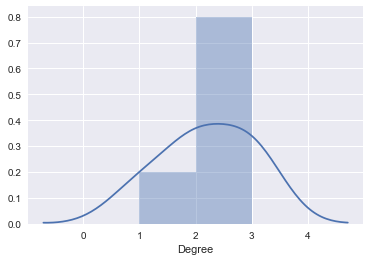

In [16]:
%matplotlib inline
sns.distplot(cmp['Degree']);
plt.show()

In [17]:
can.head()

,cid,Location,Current Job title,Degree,Experience,Skill,Salary,Preferred Job title
0,1,TX,Front End Engineer,2,6,C++,130000,Software Development Engineer
1,2,CA,Back End Enginner,2,4,C,110000,Software Engineer
2,3,CA,Database Analyst,2,1,C++,96000,Front End Engineer
3,4,NY,Software Project Manager,2,6,HTML/CSS/Javascript,200000,Back End Enginner
4,5,TX,Software Developer,2,6,C,190000,Database Analyst


In [18]:
cmp.head()

,jid,Location,Job Title,Degree,Experience,Skill,Salary
0,1,TX,Software Development Engineer,3,2,C,270000
1,2,CA,Software Engineer,1,3,"Java,C",130000
2,3,TX,Front End Engineer,2,4,C++,120000
3,4,CA,Back End Enginner,2,6,Java,180000
4,5,CA,Data Scientist,3,2,"Python,R,Data Analysis,SQL,MS Excel",127000


In [19]:
def exp_check(row,col):
    ex=(can['Experience'].values[row]-cmp['Experience'].values[col])/10
    exp.append(ex)
    degree_check(row,col)
    
#higher experience score is better,+ve    

In [20]:
def degree_check(row,col):
    deg_val=cmp['Degree'].values[col]-can['Degree'].values[row]
    deg.append(deg_val)
    salary_check(row,col)
    
# lower Score_degree is better,-ve

In [21]:
def salary_check(row,col):
    sal=(cmp['Salary'].values[col]-can['Salary'].values[row])/500000
    salary.append(sal)
    print(cmp['Salary'].values[col],can['Salary'].values[row],can['cid'].values[row],cmp['jid'].values[col],sal)
    skill_check(row,col)
    
 
#higher Score is better,+ve
    

In [22]:
len(salary)

0

In [23]:
def skill_check(row,col):
    can_skill=can['Skill'].values[row]
    cmp_skill=cmp['Skill'].values[col]
    v1 = text_to_vector(can_skill)
    v2 = text_to_vector(cmp_skill)
    cosine_canskill_with_cmpskill = get_cosine(v1, v2)
    score_skill=cosine_canskill_with_cmpskill
    skill.append(score_skill)
    location_check(row,col)

# +ve

In [24]:
def location_check(row,col):
    candidate_current_loc=can['Location'].values[row]
    cmp_loc=cmp['Location'].values[col]
    vec1 = text_to_vector(candidate_current_loc)
    vec2 = text_to_vector(cmp_loc)
    cosine_canloc_with_cmploc = get_cosine(vec1, vec2)
    score_loc=cosine_canloc_with_cmploc
    loc.append(score_loc)
    
# +ve

In [25]:
title_check(can,cmp)

270000 130000 1 1 0.28
130000 130000 1 2 0.0
120000 130000 1 3 -0.02
270000 110000 2 1 0.32
130000 110000 2 2 0.04
180000 110000 2 4 0.14
120000 96000 3 3 0.048
180000 200000 4 4 -0.04
270000 90000 6 1 0.36
130000 90000 6 2 0.08
270000 115000 7 1 0.31
130000 115000 7 2 0.03
270000 150000 8 1 0.24
130000 150000 8 2 -0.04
127000 125000 9 5 0.004


In [26]:
row_vals

[1, 1, 1, 2, 2, 2, 3, 4, 6, 6, 7, 7, 8, 8, 9]

In [27]:
len(row_vals)

15

In [28]:
col_vals

[1, 2, 3, 1, 2, 4, 3, 4, 1, 2, 1, 2, 1, 2, 5]

In [29]:
len(col_vals)

15

In [30]:
exp

[0.40000000000000002,
 0.29999999999999999,
 0.20000000000000001,
 0.20000000000000001,
 0.10000000000000001,
 -0.20000000000000001,
 -0.29999999999999999,
 0.0,
 0.0,
 -0.10000000000000001,
 0.0,
 -0.10000000000000001,
 0.10000000000000001,
 0.0,
 0.10000000000000001]

In [31]:
len(exp)

15

In [32]:
score_val

[1.0000000000000002,
 0.8164965809277259,
 1.0000000000000002,
 0.8164965809277259,
 0.9999999999999998,
 1.0000000000000002,
 1.0000000000000002,
 1.0000000000000002,
 0.8164965809277259,
 0.9999999999999998,
 1.0000000000000002,
 0.8164965809277259,
 0.8164965809277259,
 0.9999999999999998,
 0.9999999999999998]

In [33]:
len(score_val)

15

In [34]:
skill

[1.0,
 0.7071067811865475,
 1.0,
 1.0,
 0.7071067811865475,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9999999999999999]

In [35]:
len(skill)

15

In [36]:
loc

[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]

In [37]:
len(loc)

15

In [38]:
salary

[0.28000000000000003,
 0.0,
 -0.02,
 0.32000000000000001,
 0.040000000000000001,
 0.14000000000000001,
 0.048000000000000001,
 -0.040000000000000001,
 0.35999999999999999,
 0.080000000000000002,
 0.31,
 0.029999999999999999,
 0.23999999999999999,
 -0.040000000000000001,
 0.0040000000000000001]

In [39]:
len(salary)

15

In [40]:
deg

[1, -1, 0, 1, -1, 0, 0, 0, 2, 0, 1, -1, 0, -2, 0]

In [41]:
len(deg)

15

In [42]:
data={'CandidateID':row_vals,'JobId':col_vals,'Score_title':score_val,'Score_experience':exp,'Score_degree':deg,'Score_skill':skill,
'Score_location':loc,
'Score_salary':salary}


frame=pd.DataFrame(data)


frame=frame.assign(Final_score = frame.Score_title+ 0.50*frame.Score_experience - frame.Score_degree + 1.50*frame.Score_skill + frame.Score_location
             + frame.Score_salary )

# Final Result

In [43]:
#candidates macthed with jobs
frame

,CandidateID,JobId,Score_degree,Score_experience,Score_location,Score_salary,Score_skill,Score_title,Final_score
0,1,1,1,0.4,1.0,0.280,1.000000,1.000000,2.980000
1,1,2,-1,0.3,0.0,0.000,0.707107,0.816497,3.027157
2,1,3,0,0.2,1.0,-0.020,1.000000,1.000000,3.580000
3,2,1,1,0.2,0.0,0.320,1.000000,0.816497,1.736497
4,2,2,-1,0.1,1.0,0.040,0.707107,1.000000,4.150660
5,2,4,0,-0.2,1.0,0.140,0.000000,1.000000,2.040000
6,3,3,0,-0.3,0.0,0.048,1.000000,1.000000,2.398000
7,4,4,0,0.0,0.0,-0.040,0.000000,1.000000,0.960000
8,6,1,2,0.0,0.0,0.360,0.000000,0.816497,-0.823503
9,6,2,0,-0.1,0.0,0.080,0.000000,1.000000,1.030000


In [44]:
#Sorted Results based on the final score. 
#Higher the final score,greater the chances of employement of a candidate in a given job id.
frame.sort_values(by=['Final_score'],ascending=False)

,CandidateID,JobId,Score_degree,Score_experience,Score_location,Score_salary,Score_skill,Score_title,Final_score
4,2,2,-1,0.1,1.0,0.040,0.707107,1.000000,4.150660
2,1,3,0,0.2,1.0,-0.020,1.000000,1.000000,3.580000
1,1,2,-1,0.3,0.0,0.000,0.707107,0.816497,3.027157
0,1,1,1,0.4,1.0,0.280,1.000000,1.000000,2.980000
13,8,2,-2,0.0,0.0,-0.040,0.000000,1.000000,2.960000
11,7,2,-1,-0.1,1.0,0.030,0.000000,0.816497,2.796497
14,9,5,0,0.1,0.0,0.004,1.000000,1.000000,2.554000
6,3,3,0,-0.3,0.0,0.048,1.000000,1.000000,2.398000
5,2,4,0,-0.2,1.0,0.140,0.000000,1.000000,2.040000
3,2,1,1,0.2,0.0,0.320,1.000000,0.816497,1.736497


In [7]:
from bs4 import BeautifulSoup


In [8]:
from selenium import webdriver

ModuleNotFoundError: No module named 'selenium'